### Installation

In [1]:
!nvidia-smi


Wed Aug  6 19:36:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.04              Driver Version: 577.00         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   42C    P8              4W /  135W |     904MiB /   8188MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install vllm

  Using cached vllm-0.10.0-cp38-abi3-manylinux1_x86_64.whl.metadata (14 kB)
  Using cached cachetools-6.1.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached blake3-1.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached fastapi-0.116.1-py3-none-any.whl.metadata (28 kB)
  Using cached openai-1.90.0-py3-none-any.whl.metadata (26 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached prometheus_client-0.22.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached prometheus_fastapi_instrumentator-7.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached tiktoken-0.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached lm_format_enforcer-0.10.12-py3-none-any.whl.metadata (17 kB)
  Using cached llguidance-0.7.30-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached outlines_core-0.2.1

### Unsloth

Load up `Qwen 2.5 3B Instruct`, and set parameters

In [1]:
!pip list | grep torch

torch                    2.7.1
torchvision              0.22.1


In [2]:
import unsloth

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/home/kavindu_lakshitha/miniconda3/envs/unsloth-llm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!
INFO 08-07 11:04:13 [__init__.py:235] Automatically detected platform cuda.


In [3]:
from unsloth import FastLanguageModel, is_bfloat16_supported

In [4]:
import torch

In [ ]:

max_seq_length = 1024 # Can increase for longer reasoning traces
lora_rank = 64 # Larger rank = smarter, but slower

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "Qwen/Qwen2.5-3B-Instruct",
    max_seq_length = max_seq_length,
    load_in_4bit = True, # False for LoRA 16bit
    fast_inference = True, # Enable vLLM fast inference
    max_lora_rank = lora_rank,
    gpu_memory_utilization = 0.5, # Reduce if out of memory
)


model = FastLanguageModel.get_peft_model(
    model,
    r = lora_rank, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ], # Remove QKVO if out of memory
    lora_alpha = lora_rank,
    use_gradient_checkpointing = "unsloth", # Enable long context finetuning
    random_state = 3407,
)

Unsloth: Patching vLLM v1 graph capture
Unsloth: Patching vLLM v0 graph capture
==((====))==  Unsloth 2025.8.1: Fast Qwen2 patching. Transformers: 4.55.0. vLLM: 0.10.0.
   \\   /|    NVIDIA GeForce RTX 4060 Laptop GPU. Num GPUs = 1. Max memory: 7.996 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.1+cu126. CUDA: 8.9. CUDA Toolkit: 12.6. Triton: 3.3.1
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.31. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: vLLM loading unsloth/qwen2.5-3b-instruct-unsloth-bnb-4bit with actual GPU utilization = 43.16%
Unsloth: Your GPU has CUDA compute capability 8.9 with VRAM = 8.0 GB.
Unsloth: Using conservativeness = 1.0. Chunked prefill tokens = 1024. Num Sequences = 128.
Unsloth: vLLM's KV Cache can use up to 1.03 GB. Also swap space = 0 GB.
Unsloth: Not an error, but `device` is not supported in vLLM. Skipping.
INFO 08-07 11:04:40 [co

2025-08-07 11:04:41,279	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 08-07 11:04:41 [config.py:2434] Chunked prefill is enabled with max_num_batched_tokens=1024.
Unsloth: vLLM Bitsandbytes config using kwargs = {'load_in_8bit': False, 'load_in_4bit': True, 'bnb_4bit_compute_dtype': 'bfloat16', 'bnb_4bit_quant_storage': 'uint8', 'bnb_4bit_quant_type': 'nf4', 'bnb_4bit_use_double_quant': True, 'llm_int8_enable_fp32_cpu_offload': False, 'llm_int8_has_fp16_weight': False, 'llm_int8_skip_modules': ['lm_head', 'multi_modal_projector', 'merger', 'modality_projection', 'model.layers.2.mlp', 'model.layers.3.mlp', 'model.layers.30.mlp'], 'llm_int8_threshold': 6.0}
INFO 08-07 11:04:44 [core.py:71] Initializing a V1 LLM engine (v0.10.0) with config: model='unsloth/qwen2.5-3b-instruct-unsloth-bnb-4bit', speculative_config=None, tokenizer='unsloth/qwen2.5-3b-instruct-unsloth-bnb-4bit', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=1024,

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  2.63it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  2.63it/s]

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:04<00:00,  4.04s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:04<00:00,  4.05s/it]


INFO 08-07 11:04:53 [punica_selector.py:19] Using PunicaWrapperGPU.


INFO 08-07 11:04:54 [gpu_model_runner.py:1892] Model loading took 2.4392 GiB and 8.459678 seconds
INFO 08-07 11:05:10 [backends.py:530] Using cache directory: /home/kavindu_lakshitha/.cache/vllm/torch_compile_cache/34c5def232/rank_0_0/backbone for vLLM's torch.compile
INFO 08-07 11:05:10 [backends.py:541] Dynamo bytecode transform time: 15.20 s
INFO 08-07 11:05:20 [backends.py:161] Directly load the compiled graph(s) for dynamic shape from the cache, took 8.880 s
INFO 08-07 11:05:23 [monitor.py:34] torch.compile takes 15.20 s in total
INFO 08-07 11:05:24 [gpu_worker.py:255] Available KV cache memory: 0.29 GiB
INFO 08-07 11:05:25 [kv_cache_utils.py:833] GPU KV cache size: 8,496 tokens
INFO 08-07 11:05:25 [kv_cache_utils.py:837] Maximum concurrency for 1,024 tokens per request: 8.30x
INFO 08-07 11:05:25 [vllm_utils.py:641] Unsloth: Running patched vLLM v1 `capture_model`.


Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]

INFO 08-07 11:05:42 [gpu_model_runner.py:2485] Graph capturing finished in 17 secs, took 0.84 GiB
INFO 08-07 11:05:42 [vllm_utils.py:648] Unsloth: Patched vLLM v1 graph capture finished in 17 secs.


INFO 08-07 11:05:43 [core.py:193] init engine (profile, create kv cache, warmup model) took 49.04 seconds
Unsloth: Just some info: will skip parsing ['q_norm', 'k_norm', 'post_feedforward_layernorm', 'pre_feedforward_layernorm']
Unsloth: Just some info: will skip parsing ['q_norm', 'k_norm', 'post_feedforward_layernorm', 'pre_feedforward_layernorm']


Unsloth 2025.8.1 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


In [ ]:

import csv
import re
from typing import List, Dict, Any

# Path to your CSV file
csv_file = 'data/annotation.csv'

# System prompt for GRPO reasoning format
SYSTEM_PROMPT = """
You are an assistant that helps people find objects in a room. You are given a list of objects in a room together with a text descriptions. 
You should determine the target object and anchor object in the text description and map it to the objects in the room. If the object is in the room, just pick it. 
However, if the object cannot be find in the room, you should pick a room object that is the most similar to the target object.
Extract only the target object name that the user says where the action is needed to be performed.

Respond in the following format:
<reasoning>
Explain how you identified the target object from the user's input.
</reasoning>
<answer>
target: extracted object
anchor: anchor object if needed
</answer>
"""

XML_COT_FORMAT = """
<reasoning>
{reasoning}
</reasoning>
<answer>
{answer}
</answer>
"""

def extract_xml_answer(text: str) -> str:
    answer = text.split("<answer>")[-1]
    answer = answer.split("</answer>")[0]
    return answer.strip()

def extract_hash_answer(text: str) -> str | None:
    if "####" not in text:
        return None
    return text.split("####")[1].strip()

# Load and prepare dataset from CSV
def load_csv_questions(csv_path: str) -> List[Dict[str, Any]]:
    data = []
    with open(csv_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            # 'text' is the input, 'object_label' is the output (answer)
            prompt = [
                {'role': 'system', 'content': SYSTEM_PROMPT},
                {'role': 'user', 'content': row['text']}
            ]
            answer = row['object_label']
            data.append({'prompt': prompt, 'answer': answer})
    return data

dataset = load_csv_questions(csv_file)

# Reward functions
def correctness_reward_func(prompts, completions, answer, **kwargs) -> List[float]:
    responses = [completion[0]['content'] for completion in completions]
    q = prompts[0][-1]['content']
    extracted_responses = [extract_xml_answer(r) for r in responses]
    print('-'*20, f"Question:\n{q}", f"\nAnswer:\n{answer[0]}", f"\nResponse:\n{responses[0]}", f"\nExtracted:\n{extracted_responses[0]}")
    return [2.0 if r == a else 0.0 for r, a in zip(extracted_responses, answer)]

def int_reward_func(completions, **kwargs) -> List[float]:
    responses = [completion[0]['content'] for completion in completions]
    extracted_responses = [extract_xml_answer(r) for r in responses]
    return [0.5 if r.isdigit() else 0.0 for r in extracted_responses]

def strict_format_reward_func(completions, **kwargs) -> List[float]:
    """Reward function that checks if the completion has a specific format."""
    pattern = r"^<reasoning>\n.*?\n</reasoning>\n<answer>\n.*?\n</answer>\n$"
    responses = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, r) for r in responses]
    return [0.5 if match else 0.0 for match in matches]

def soft_format_reward_func(completions, **kwargs) -> List[float]:
    """Reward function that checks if the completion has a specific format."""
    pattern = r"<reasoning>.*?</reasoning>\s*<answer>.*?</answer>"
    responses = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, r) for r in responses]
    return [0.5 if match else 0.0 for match in matches]

def count_xml(text) -> float:
    count = 0.0
    if text.count("<reasoning>\n") == 1:
        count += 0.125
    if text.count("\n</reasoning>\n") == 1:
        count += 0.125
    if text.count("\n<answer>\n") == 1:
        count += 0.125
        count -= len(text.split("\n</answer>\n")[-1])*0.001
    if text.count("\n</answer>") == 1:
        count += 0.125
        count -= (len(text.split("\n</answer>")[-1]) - 1)*0.001
    return count

def xmlcount_reward_func(completions, **kwargs) -> List[float]:
    contents = [completion[0]["content"] for completion in completions]
    return [count_xml(c) for c in contents]



<a name="Train"></a>
### Train the model

Now set up GRPO Trainer and all configurations!

In [10]:
from trl import GRPOConfig, GRPOTrainer
training_args = GRPOConfig(
    use_vllm = True, # use vLLM for fast inference!
    learning_rate = 5e-6,
    adam_beta1 = 0.9,
    adam_beta2 = 0.99,
    weight_decay = 0.1,
    warmup_ratio = 0.1,
    lr_scheduler_type = "cosine",
    optim = "adamw_8bit",
    logging_steps = 1,
    per_device_train_batch_size = 1,
    gradient_accumulation_steps = 1, # Increase to 4 for smoother training
    num_generations = 8, # Decrease if out of memory
    max_prompt_length = 256,
    max_completion_length = 200,
    # num_train_epochs = 1, # Set to 1 for a full training run
    max_steps = 250,
    save_steps = 250,
    max_grad_norm = 0.1,
    report_to = "none", # Can use Weights & Biases
    output_dir = "outputs",
)

Unsloth: We now expect `per_device_train_batch_size` to be a multiple of `num_generations`.
We will change the batch size of 1 to the `num_generations` of 8


In [11]:
trainer = GRPOTrainer(
    model = model,
    processing_class = tokenizer,
    reward_funcs = [
        xmlcount_reward_func,
        soft_format_reward_func,
        strict_format_reward_func,
        int_reward_func,
        correctness_reward_func,
    ],
    args = training_args,
    train_dataset = dataset,
)
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 19,648 | Num Epochs = 1 | Total steps = 250
O^O/ \_/ \    Batch size per device = 8 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (8 x 1 x 1) = 8
 "-____-"     Trainable parameters = 119,734,272 of 3,205,672,960 (3.74% trained)


-------------------- Question:
lie on the bed that is closer to the backpack 
Answer:
bed 
Response:
<reasoning>
The user is instructing to lie on a bed that is near a specific backpack. The target object here is the bed where the action is being performed, and the anchor object is the backpack, which is mentioned but not the specific target object needing to be identified.
</reasoning>
<answer>
target: bed
anchor: backpack
</answer> 
Extracted:
target: bed
anchor: backpack


Step,Training Loss,reward,reward_std,completions / mean_length,completions / min_length,completions / max_length,completions / clipped_ratio,completions / mean_terminated_length,completions / min_terminated_length,completions / max_terminated_length,kl,entropy,rewards / xmlcount_reward_func / mean,rewards / xmlcount_reward_func / std,rewards / soft_format_reward_func / mean,rewards / soft_format_reward_func / std,rewards / strict_format_reward_func / mean,rewards / strict_format_reward_func / std,rewards / int_reward_func / mean,rewards / int_reward_func / std,rewards / correctness_reward_func / mean,rewards / correctness_reward_func / std
1,-0.000000,0.144000,0.055570,83.875000,68.000000,99.000000,0.000000,83.875000,68.000000,99.000000,0.000000,0,0.144000,0.055570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.000000,0.149750,0.155134,81.000000,59.000000,134.000000,0.000000,81.000000,59.000000,134.000000,0.000000,No Log,0.149750,0.155134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.118500,0.132892,88.500000,60.000000,154.000000,0.000000,88.500000,60.000000,154.000000,0.000810,No Log,0.118500,0.132892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.113125,0.055044,88.625000,78.000000,115.000000,0.000000,88.625000,78.000000,115.000000,0.001882,No Log,0.113125,0.055044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.072875,0.121440,93.250000,62.000000,142.000000,0.000000,93.250000,62.000000,142.000000,0.001331,No Log,0.072875,0.121440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,-0.081625,0.180138,123.375000,90.000000,167.000000,0.000000,123.375000,90.000000,167.000000,0.001576,No Log,-0.081625,0.180138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,-0.002375,0.197957,102.750000,57.000000,136.000000,0.000000,102.750000,57.000000,136.000000,0.001599,No Log,-0.002375,0.197957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.193250,0.052032,72.750000,57.000000,86.000000,0.000000,72.750000,57.000000,86.000000,0.001229,No Log,0.193250,0.052032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.184875,0.040155,74.000000,63.000000,90.000000,0.000000,74.000000,63.000000,90.000000,0.001491,No Log,0.184875,0.040155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.023375,0.068883,100.875000,80.000000,127.000000,0.000000,100.875000,80.000000,127.000000,0.001459,No Log,0.023375,0.068883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


-------------------- Question:
sit on the chair 
Answer:
chair 
Response:
<reasoning>
The user asked to "sit on the chair". This implies that "the chair" is the object the user currently intends to sit on. Therefore, "the chair" should be the target object.
</reasoning>
<answer>
target: chair
anchor: None needed
</answer> 
Extracted:
target: chair
anchor: None needed
Unsloth: Will smartly offload gradients to save VRAM!
-------------------- Question:
sit on the couch that is farthest from the fireplace 
Answer:
couch 
Response:
<reasoning>
The user's input "sit on the couch that is farthest from the fireplace" specifies that the action is to sit on a couch. The furniture in a typical room often includes a couch (so it's highly probable that a couch can be found). The fireplace provides context that helps narrow down the room to a living room or a similar space.
</reasoning>
<answer>
target: couch
anchor: fireplace
</answer> 
Extracted:
target: couch
anchor: fireplace
------------------

TrainOutput(global_step=250, training_loss=0.0003810035985792126, metrics={'train_runtime': 1698.1409, 'train_samples_per_second': 1.178, 'train_steps_per_second': 0.147, 'total_flos': 0.0, 'train_loss': 0.0003810035985792126})

<a name="Inference"></a>
### Inference
Now let's try the model we just trained! First, let's first try the model without any GRPO trained:

In [7]:
COT_PROMPT = """
Here are the examples:
Assume the room has: table, sofa chair, door, bed, washing machine, toliet.
Please note that anchors should be split by ",".
1. Walk to the bathroom vanity. Please answer:
    target: toliet
    anchor: None
2. Sit on the chair that is next to the tables. Please answer:
    target: sofa chair
    anchor: table
3. Lie on the tables that is in the center of the door and the bed. Please answer:
    target: table
    anchor: door, bed
4. Stand up from the chair that is next to the tables. Please answer:
    target: sofa chair
    anchor: table
    """

In [8]:
text = tokenizer.apply_chat_template([
    {"role": "assistant", "content": COT_PROMPT},
    {"role" : "user", "content" : "lie on the bed that is farthest from the door"},
], tokenize = False, add_generation_prompt = True)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,
    top_p = 0.95,
    max_tokens = 1024,
)
output = model.fast_generate(
    [text],
    sampling_params = sampling_params,
    lora_request = None,
)[0].outputs[0].text

output

Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.47s/it, est. speed input: 131.95 toks/s, output: 44.21 toks/s]


'Based on the items provided (table, sofa chair, door, bed, washing machine, toliet), if you want to lie on the bed that is farthest from the door, the target would be the bed, and the anchor would be the door.\n\n- **target:** bed\n- **anchor:** door'

And now with the LoRA we just trained with GRPO - we first save the LoRA first!

In [15]:
model.save_lora("grpo_saved_lora")

Now we load the LoRA and test:

In [9]:
text = tokenizer.apply_chat_template([
    {"role" : "system", "content" : SYSTEM_PROMPT},
    {"role" : "assistant", "content" : COT_PROMPT},
    {"role" : "user", "content" : "lie on the table that is close to the cabinet"},
], tokenize = False, add_generation_prompt = True)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,
    top_p = 0.95,
    max_tokens = 1024,
)
output = model.fast_generate(
    text,
    sampling_params = sampling_params,
    lora_request = model.load_lora("grpo_saved_lora"),
)[0].outputs[0].text

output

Processed prompts: 100%|██████████| 1/1 [00:04<00:00,  4.36s/it, est. speed input: 76.67 toks/s, output: 13.08 toks/s]


'<reasoning>\nThe user is asking to lie on a table that is close to a cabinet. Among the objects in the room, the table is the most likely target for this action.\n</reasoning>\n<answer>\ntarget: table\nanchor: cabinet\n</answer>\n'

### Training Output Summary

Below is a table of the training metrics and charts visualizing the training loss and runtime.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Training output data
metrics = {
    'global_step': 250,
    'training_loss': 0.0003810035985792126,
    'train_runtime': 1698.1409,
    'train_samples_per_second': 1.178,
    'train_steps_per_second': 0.147,
    'total_flos': 0.0,
    'train_loss': 0.0003810035985792126
    
}

# Display as table
metrics_df = pd.DataFrame([metrics])
display(metrics_df)



,global_step,training_loss,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,250,0.000381,1698.1409,1.178,0.147,0.0,0.000381


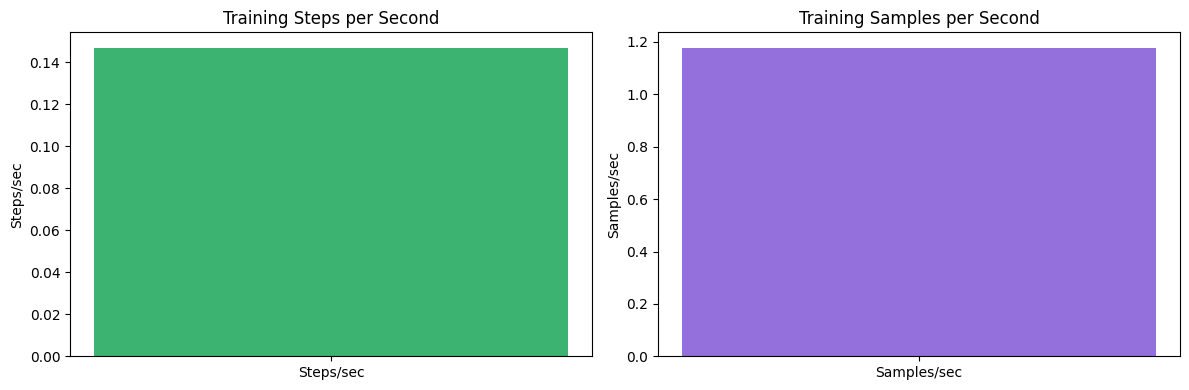

In [6]:
# Additional charts for training metrics
import seaborn as sns

# Metrics for charting
steps_per_sec = metrics['train_steps_per_second']
samples_per_sec = metrics['train_samples_per_second']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Steps per second
ax[0].bar(['Steps/sec'], [steps_per_sec], color='mediumseagreen')
ax[0].set_title('Training Steps per Second')
ax[0].set_ylabel('Steps/sec')

# Samples per second
ax[1].bar(['Samples/sec'], [samples_per_sec], color='mediumpurple')
ax[1].set_title('Training Samples per Second')
ax[1].set_ylabel('Samples/sec')

plt.tight_layout()
plt.show()